# Graphs

Graphing data...

In [182]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.optimize import curve_fit

In [183]:
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')

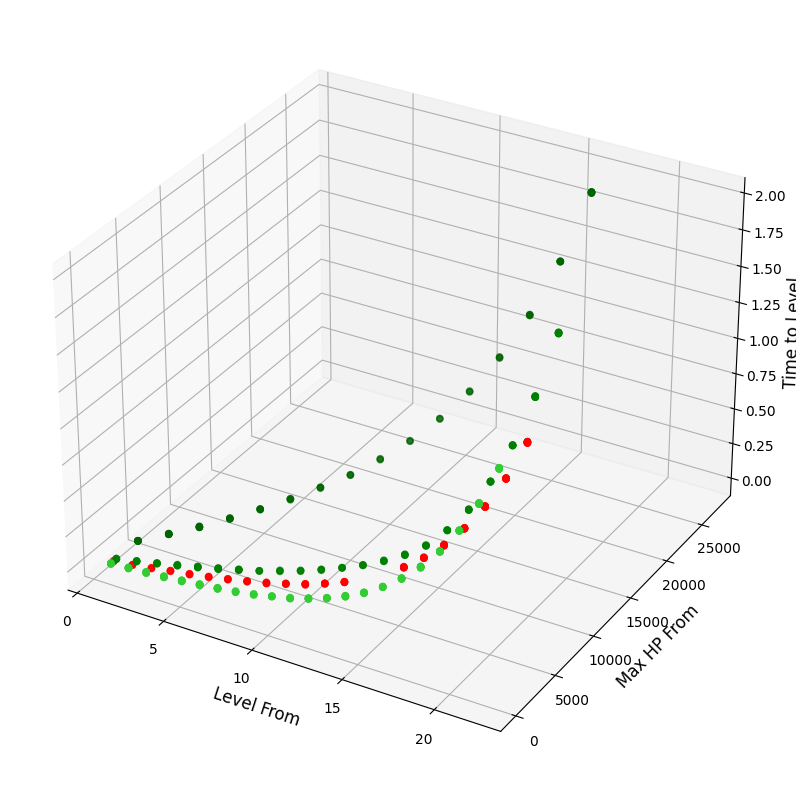

In [184]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

plt.show()

In [185]:
def f(X, a, b, c, d, e, f, g):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level) + (g ** hp)

X1 = np.concatenate((crabs[:, 1], crocs[:, 1], goos[:, 1], snakes[:, 1]))
X2 = np.concatenate((crabs[:, 3], crocs[:, 3], goos[:, 3], snakes[:, 3]))
Y = np.concatenate((crabs[:, 0], crocs[:, 0], goos[:, 0], snakes[:, 0]))

popt, pcov = curve_fit(f, (X1, X2), Y)

C:\Users\Hyprk\AppData\Local\Temp\ipykernel_14104\824303001.py:3: RuntimeWarning: overflow encountered in power
  return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level) + (g ** hp)


In [186]:
popt

array([ 8.27487697e+05, -3.14574768e+05,  3.33685355e+04, -5.83548775e+00,
        1.06532772e-02,  2.02835409e+00,  1.00057840e+00])

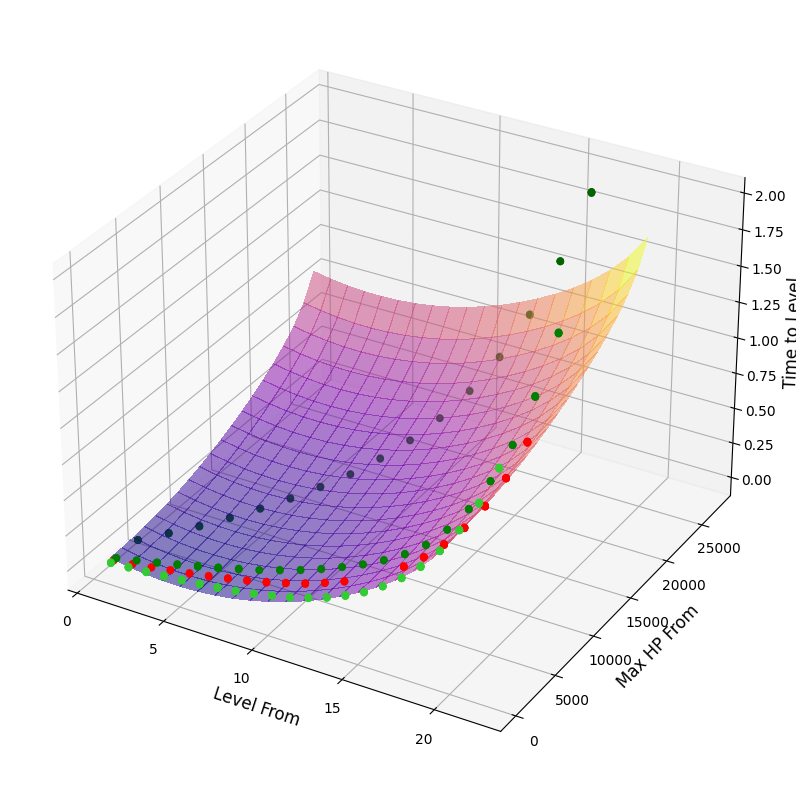

In [187]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

LEVELS = np.linspace(1, 20, 20)
MAX_HP = np.linspace(100, 25000, 20)
X, Y = np.meshgrid(LEVELS, MAX_HP)
Z = f((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, alpha=0.5, linewidth=0, antialiased=False)

plt.show()

In [188]:
print(f"{popt[0]} + ({popt[1]} * level) + ({popt[2]} * (level ** 2)) + ({popt[3]} * hp) + ({popt[4]} * (hp ** 2)) + ({popt[5]} ** level) + ({popt[6]} ** hp)")

827487.6969355132 + (-314574.7679581853 * level) + (33368.53553678172 * (level ** 2)) + (-5.835487753341973 * hp) + (0.01065327722963157 * (hp ** 2)) + (2.0283540850245267 ** level) + (1.0005783954155452 ** hp)
